In [122]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import umap
%matplotlib notebook

In [24]:
dath = pd.read_csv("../data/traces_high.txt",sep=' ',header=None)
datl = pd.read_csv("../data/traces_low.txt",sep=' ',header=None)

datl

,0,1,2,3,4,5,6,7,8,9,...,210,211,212,213,214,215,216,217,218,219
0,0.762018,0.741018,0.095018,-0.907982,-1.025982,-0.505982,-0.031982,0.146018,0.130018,0.035018,...,0.028197,0.035197,0.030197,0.010197,0.007197,0.037197,0.058197,0.043197,0.030197,0.039197
1,0.737018,0.717018,0.087018,-0.911982,-1.026982,-0.537982,-0.047982,0.204018,0.151018,-0.023982,...,0.036197,0.034197,0.034197,0.032197,0.029197,0.039197,0.043197,0.039197,0.041197,0.038197
2,0.748018,0.707018,0.075018,-0.925982,-1.035982,-0.499982,-0.026982,0.177018,0.157018,0.010018,...,0.005197,0.021197,0.041197,0.036197,0.024197,0.019197,0.028197,0.024197,0.035197,0.042197
3,0.757018,0.727018,0.107018,-0.910982,-1.039982,-0.487982,0.006018,0.156018,0.109018,0.014018,...,0.042197,0.048197,0.029197,0.036197,0.045197,0.029197,0.022197,0.016197,0.013197,0.016197
4,0.734018,0.698018,0.108018,-0.905982,-1.062982,-0.496982,0.021018,0.165018,0.106018,0.020018,...,0.025197,0.036197,0.034197,0.032197,0.025197,0.022197,0.028197,0.037197,0.060197,0.062197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.825505,0.728505,-0.175495,-1.058495,-0.919495,-0.337495,0.088505,0.233505,0.144505,-0.004495,...,0.041857,0.044857,0.062857,0.070857,0.054857,0.046857,0.051857,0.062857,0.057857,0.055857
9996,0.788505,0.689505,-0.176495,-1.023495,-0.883495,-0.288495,0.113505,0.204505,0.140505,0.013505,...,0.031857,0.018857,0.040857,0.051857,0.054857,0.048857,0.022857,0.016857,0.041857,0.054857
9997,0.780505,0.723505,-0.134495,-1.016495,-0.902495,-0.311495,0.074505,0.175505,0.141505,0.038505,...,0.036857,0.043857,0.041857,0.041857,0.049857,0.045857,0.046857,0.055857,0.058857,0.050857
9998,0.737505,0.646505,-0.194495,-1.043495,-0.955495,-0.346495,0.128505,0.223505,0.115505,0.025505,...,0.033857,0.060857,0.074857,0.047857,0.047857,0.056857,0.043857,0.032857,0.034857,0.045857


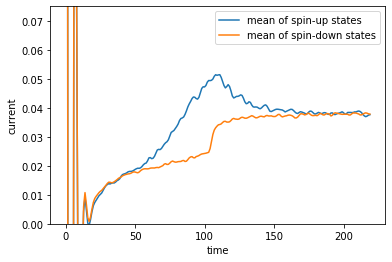

In [38]:
fig, ax = plt.subplots()

ax.plot(dath.mean(0),label="mean of spin-up states")
ax.plot(datl.mean(0),label="mean of spin-down states")

ax.set(xlabel="time",
       ylabel="current",
       ylim=(0,0.075))

ax.legend()

In [129]:
pad = 200

paddedh = np.hstack([dath.to_numpy(),np.zeros((dath.shape[0],pad))])

paddedl = np.hstack([datl.to_numpy(),np.zeros((dath.shape[0],pad))])

FTh = np.fft.rfft(paddedh)

FTl = np.fft.rfft(paddedl)

<IPython.core.display.Javascript object>


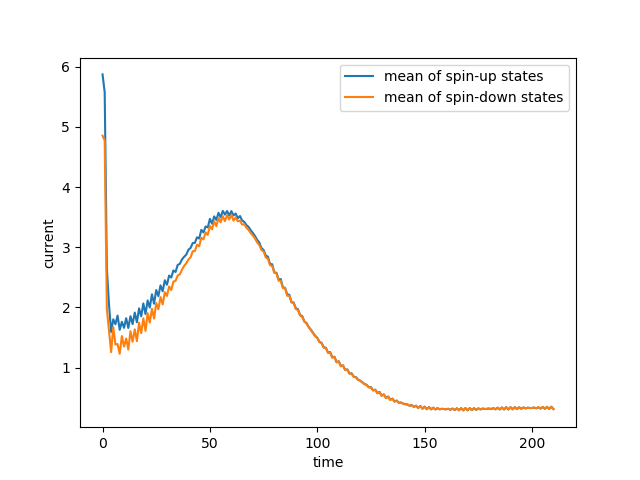

In [130]:
fig, ax = plt.subplots()

ax.plot(np.absolute(FTh).mean(0),label="mean of spin-up states")
ax.plot(np.absolute(FTl).mean(0),label="mean of spin-down states")

ax.set(xlabel="time",
       ylabel="current")

ax.legend()

# Testing "straight out of the box" classification with supervised UMAP

In [136]:
N_subset = 5000

subset = np.vstack([FTh[:N_subset],FTl[:N_subset]])
subset = np.hstack([np.absolute(subset),np.angle(subset)])
subset.shape

truths = [1]*N_subset+[0]*N_subset

In [137]:
u = umap.UMAP(verbose=True)
emb = u.fit_transform(subset,y=truths)

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=None, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=True)
Construct fuzzy simplicial set
Thu Jan 13 14:08:03 2022 Finding Nearest Neighbors
Thu Jan 13 14:08:03 2022 Building RP forest with 10 trees
Thu Jan 13 14:08:04 2022 NN descent for 13 iterations
	 0  /  13
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	 5  /  13
	 6  /  13
	 7  /  13
	 8  /  13
	 9  /  13
Thu Jan 13 14:08:06 2022 Finished Nearest Neighbor Search
Thu Jan 13 14:08

<IPython.core.display.Javascript object>


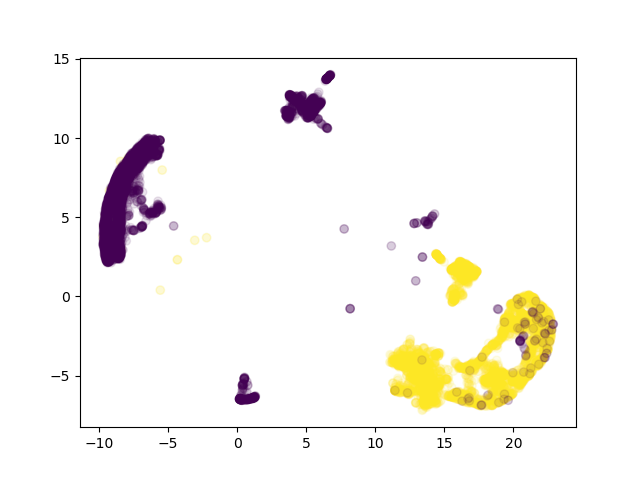

In [151]:
fig, ax = plt.subplots()

ax.scatter(emb[:,0],emb[:,1],c=truths,alpha=0.1)

In [148]:
test_set = np.vstack([FTh[N_subset:],FTl[N_subset:]])
test_set = np.hstack([np.absolute(test_set),np.angle(test_set)])


test_truths = [1]*(FTh.shape[0]-N_subset)+[0]*(FTl.shape[0]-N_subset)

In [144]:
emb_test = u.transform(test_set)

	completed  0  /  100 epochs
	completed  10  /  100 epochs
	completed  20  /  100 epochs
	completed  30  /  100 epochs
	completed  40  /  100 epochs
	completed  50  /  100 epochs
	completed  60  /  100 epochs
	completed  70  /  100 epochs
	completed  80  /  100 epochs
	completed  90  /  100 epochs


<IPython.core.display.Javascript object>


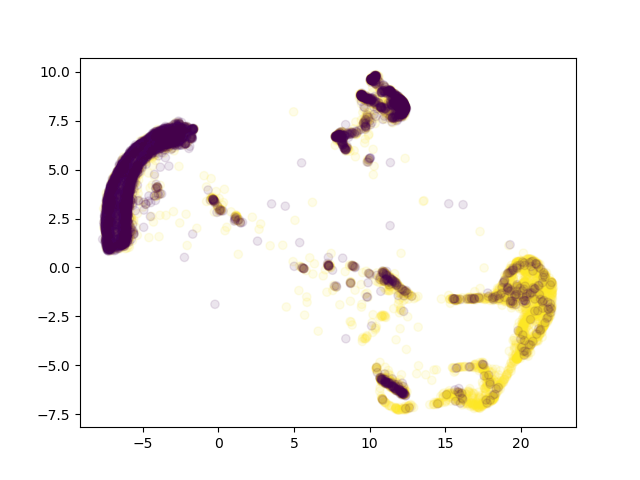

In [150]:
fig, ax = plt.subplots()
ax.scatter(emb_test[:,0],emb_test[:,1],c=test_truths,alpha=0.1)

# Testing straight out of the box classification with BDT

In [153]:
import xgboost

In [160]:
xgb_cla = xgboost.sklearn.XGBClassifier(verbose=True)

In [162]:
xgb_cla.fit(subset,truths)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbose=True, verbosity=None)

In [166]:
pred = xgb_cla.predict(test_set)

In [170]:
(pred == test_truths).sum()/pred.shape[0]

0.7998